In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KernelDensity
from scipy.stats import uniform

matplotlib.rcParams.update({'font.size': 15})
plt.rcParams["font.family"] = "serif"

In [20]:
# # Empirical Cumulative Distribution Function

# # A normal distribution with mean 5 and standard deviation 1.5
# mu, sigma = 5, 1.5
# x = np.arange(0, 10, 0.5)
# y = abs(1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu)**2 / sigma**2))

# # Noisy data
# y1 = y + abs(np.random.normal(0, 0.1, len(x)))

# # Plot cumulative distribution function using cumsum
# plt.plot(x, y.cumsum()/max(y.cumsum()), label = 'Theoretical CDF')

# plt.step(x, y1.cumsum()/max(y1.cumsum()), label = 'Empirical Distribution Function')

# plt.xlabel('x')
# plt.ylabel('F(x)')
# plt.legend(fontsize = 10)
# plt.grid()
# plt.savefig('empirical_cdf.png')

In [4]:
## Ordinary least squares vs weighted least squares

# # Exponential distribution with varying errors
# x = np.linspace(1, 5, 100)
# y = 5*x
# y_err = np.random.normal(0, 0.5, len(x))*y
# y_err = np.abs(y_err)
# y = y + y_err

# plt.errorbar(x, y, yerr = y_err, fmt = 'o', label = 'Data', markersize = 2, linewidth = 1)

# # Ordinary least squares and weighted least squares
# A = np.vstack([x, np.ones(len(x))]).T
# w = np.diag(1/y_err)
# theta = np.linalg.inv(A.T @ w @ A) @ A.T @ w @ y
# y_hat = A @ theta
# plt.plot(x, y_hat, label = 'Ordinary Least Squares', linewidth = 2)

# theta = np.linalg.inv(A.T @ A) @ A.T @ y
# y_hat = A @ theta
# plt.plot(x, y_hat, label = 'Weighted Least Squares', linewidth = 2)

# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(fontsize = 10, loc = 'upper left')
# plt.grid()
# # plt.savefig('ols_vs_wls.png')

In [5]:
# # Lag plots and ACF

# # Lag plot and ACF for a noisy sinusoidal signal
# x = np.linspace(0, 100, 50)
# x_cl = np.linspace(0, 100, 1000)
# y_cl = np.sin(x_cl*np.pi/4)
# y = np.sin(x*np.pi/4) + np.random.normal(0, 0.1, len(x))

# fig, ax = plt.subplots(1, 1, figsize = (10, 7))
# ax.plot(x_cl, y_cl, color = 'red')
# ax.scatter(x, y, label = 'Data', s = 25)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.grid(True)
# # plt.savefig('sinusoidal_data.png')

# # First 9 Lag Plots
# fig, ax = plt.subplots(3, 3, figsize = (15, 15))
# for i in range(9):
#     ax[i//3, i%3].scatter(y[:-i-1], y[i+1:], s = 20)
#     ax[i//3, i%3].set_title(f'Lag = {i+1}')
# for a in ax.flatten():
#     a.grid(True)
#     a.set_xlabel('y(t)')
#     a.set_ylabel('y(t + lag)')
# plt.tight_layout()
# # plt.savefig('lag_plots.png')

# # ACF plot
# fig, ax = plt.subplots(1, 1, figsize = (10, 7))
# _ = ax.acorr(y, maxlags = 10, usevlines = True, normed = True, lw = 2)
# ax.set_xlabel('Lag')
# ax.set_xlim(0,10)
# ax.set_ylabel('ACF')
# ax.grid(True)
# # plt.savefig('acf.png')

In [6]:
## Fourier power spectrum

# # A double sine wave with noise
# x = np.linspace(0, 100, 1000)
# y = 2*np.sin(2*np.pi*x/10) + 3*np.sin(2*np.pi*x/5) + np.random.normal(0, 0.5, len(x))
# y_cl = 2*np.sin(2*np.pi*x/10) + 3*np.sin(2*np.pi*x/5)

# fig,ax = plt.subplots(1, 1, figsize = (10, 7))
# ax.plot(x, y_cl, color = 'red')
# ax.scatter(x, y, label = 'Data', s = 10)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_xlim(0, 50)
# ax.grid(True)
# # plt.savefig('double_sine_wave.png')

# # Fourier power spectrum
# yf = np.fft.fft(y)
# xf = np.fft.fftfreq(len(x), x[1] - x[0])
# xf = np.fft.fftshift(xf)
# yplot = np.fft.fftshift(np.abs(yf))

# fig, ax = plt.subplots(1, 1, figsize = (10, 7))
# ax.plot(xf, yplot, label = 'Fourier Power Spectrum', color = 'green')
# ax.set_yscale('log')
# ax.set_xlim(0, 0.5)
# # ax.set_ylim(1e-1, 1e3)
# ax.set_xlabel('Frequency')
# ax.set_ylabel('Power Spectrum')
# ax.grid(True)
# # plt.savefig('fourier_power_spectrum.png')

In [46]:
## Clustering

# # Data clustered at [-1, 1], [-1, -1], [1, -1], [1, 1] as gaussians
# np.random.seed(0)
# x1 = np.random.normal(-0.7, 0.25, 200)
# y1 = np.random.normal(-0.7, 0.25, 200)
# x2 = np.random.normal(0.7, 0.25, 200)
# y2 = np.random.normal(-0.7, 0.25, 200)
# x3 = np.random.normal(-0.7, 0.25, 200)
# y3 = np.random.normal(0.7, 0.25, 200)
# x4 = np.random.normal(0.7, 0.25, 200)
# y4 = np.random.normal(0.7, 0.25, 200)

# fig, axes = plt.subplots(1, 3, figsize = (25, 7))
# ax = axes[0]
# ax.scatter(x1, y1, label = 'Cluster 1', s = 10)
# ax.scatter(x2, y2, label = 'Cluster 2', s = 10)
# ax.scatter(x3, y3, label = 'Cluster 3', s = 10)
# ax.scatter(x4, y4, label = 'Cluster 4', s = 10)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# # ax.legend(fontsize = 10, loc = 'upper right')
# ax.grid(True)
# ax.set_title('Data Clusters')
# # plt.savefig('clustered_data.png')

# # Hierarchical clustering - Single Linkage
# # X = np.vstack([np.hstack([x1, x2, x3, x4]), np.hstack([y1, y2, y3, y4])]).T
# # clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'single').fit(X)
# # labels = clustering.labels_

# # ax = axes[1]
# # ax.scatter(X[labels == 0, 0], X[labels == 0, 1], label = 'Cluster 1', s = 10)
# # ax.scatter(X[labels == 1, 0], X[labels == 1, 1], label = 'Cluster 2', s = 10)
# # ax.scatter(X[labels == 2, 0], X[labels == 2, 1], label = 'Cluster 3', s = 10)
# # ax.scatter(X[labels == 3, 0], X[labels == 3, 1], label = 'Cluster 4', s = 10)
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.legend(fontsize = 10, loc = 'upper right')
# # ax.grid(True)
# # ax.set_title('Hierarchical Clustering - Single Linkage')

# # # Hierarchical clustering - Average Linkage
# # clustering = AgglomerativeClustering(n_clusters = 4, linkage = 'average').fit(X)
# # labels = clustering.labels_

# # ax = axes[2]
# # ax.scatter(X[labels == 0, 0], X[labels == 0, 1], label = 'Cluster 1', s = 10)
# # ax.scatter(X[labels == 1, 0], X[labels == 1, 1], label = 'Cluster 2', s = 10)
# # ax.scatter(X[labels == 2, 0], X[labels == 2, 1], label = 'Cluster 3', s = 10)
# # ax.scatter(X[labels == 3, 0], X[labels == 3, 1], label = 'Cluster 4', s = 10)
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.legend(fontsize = 10, loc = 'upper right')
# # ax.grid(True)
# # ax.set_title('Hierarchical Clustering - Average Linkage')

# # plt.tight_layout()
# # # plt.savefig('hierarchical_clustering.png')

# # KMeans clustering
# # X = np.vstack([np.hstack([x1, x2, x3, x4]), np.hstack([y1, y2, y3, y4])]).T

# # # Silhouette score
# # from sklearn.metrics import silhouette_score
# # silhouette_scores = []
# # for i in range(2, 10):
# #     kmeans = KMeans(n_clusters = i, random_state = 0).fit(X)
# #     labels = kmeans.labels_
# #     silhouette_scores.append(silhouette_score(X, labels))

# # ax = axes[1]
# # ax.plot(range(2, 10), silhouette_scores, marker = 'o')
# # ax.set_xlabel('Number of Clusters')
# # ax.set_ylabel('Silhouette Score')
# # ax.grid(True)
# # ax.set_title('Silhouette Score')

# # # KMeans clustering
# # kmeans = KMeans(n_clusters = 4, random_state = 0).fit(X)
# # labels = kmeans.labels_

# # ax = axes[2]
# # ax.scatter(X[labels == 0, 0], X[labels == 0, 1], label = 'Cluster 1', s = 10)
# # ax.scatter(X[labels == 1, 0], X[labels == 1, 1], label = 'Cluster 2', s = 10)
# # ax.scatter(X[labels == 2, 0], X[labels == 2, 1], label = 'Cluster 3', s = 10)
# # ax.scatter(X[labels == 3, 0], X[labels == 3, 1], label = 'Cluster 4', s = 10)
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.legend(fontsize = 10, loc = 'upper right')
# # ax.grid(True)
# # ax.set_title('KMeans Clustering')

# # plt.tight_layout()
# # plt.savefig('kmeans_clustering.png')

# # DBSCAN clustering
# # X = np.vstack([np.hstack([x1, x2, x3, x4]), np.hstack([y1, y2, y3, y4])]).T

# # # DBSCAN clustering
# # dbscan = DBSCAN(eps = 0.3, min_samples = 10).fit(X)
# # labels = dbscan.labels_

# # ax = axes[1]
# # for i in range(len(np.unique(labels))):
# #     ax.scatter(X[labels == i, 0], X[labels == i, 1], label = f'Cluster {i}', s = 10)
# # ax.scatter(X[labels == -1, 0], X[labels == -1, 1], label = 'Noise', s = 10, color = 'black')

# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # # ax.legend(fontsize = 10, loc = 'upper right')
# # ax.grid(True)
# # ax.set_title('DBSCAN (eps = 0.3, min_samples = 10)')

# # dbscan = DBSCAN(eps = 0.2, min_samples = 10).fit(X)
# # labels = dbscan.labels_

# # ax = axes[2]
# # for i in range(len(np.unique(labels))):
# #     ax.scatter(X[labels == i, 0], X[labels == i, 1], label = f'Cluster {i}', s = 10)
# # ax.scatter(X[labels == -1, 0], X[labels == -1, 1], label = 'Noise', s = 10, color = 'black')

# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # # ax.legend(fontsize = 10, loc = 'upper right')
# # ax.grid(True)
# # ax.set_title('DBSCAN (eps = 0.2, min_samples = 10)')

# # plt.tight_layout()
# # # plt.savefig('dbscan_clustering.png')

In [88]:
# ## Different kinds of smoothing

# # A noisy sinusoidal signal
# x = np.linspace(0, 20, 100)
# y = np.sin(x*np.pi/4) + x/10 + np.cos(x*np.pi/2) + np.random.normal(0, 0.5, len(x)) 
# y_cl = np.sin(x*np.pi/4) + x/10 + np.cos(x*np.pi/2)

# # Remove some random points between 20 and 35
# idx = np.random.choice(range(20, 40), 7, replace = False)
# x = np.delete(x, idx)
# y = np.delete(y, idx)

# fig, ax = plt.subplots(1, 1, figsize = (10, 7))
# # ax.plot(x, y_cl, color = 'red')
# ax.scatter(x, y, label = 'Data', s = 10)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.grid(True)
# # plt.savefig('noisy_sinusoidal_data.png')

# # KDE smoothing

# # Rectangular kernel
# kde = KernelDensity(kernel = 'tophat', bandwidth = 0.5).fit(x.reshape(-1, 1))
# x_plot = np.linspace(0, 20, 1000)
# log_dens = kde.score_samples(x_plot.reshape(-1, 1))
# dens = np.exp(log_dens)

# fig, ax = plt.subplots(1, 1, figsize = (10, 7))
# ax.scatter(x, y, label = 'Data', s = 10)
# ax.plot(x_plot, dens, label = 'Rectangular Kernel', color = 'red')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.grid(True)
# # plt.savefig('kde_rectangular.png')

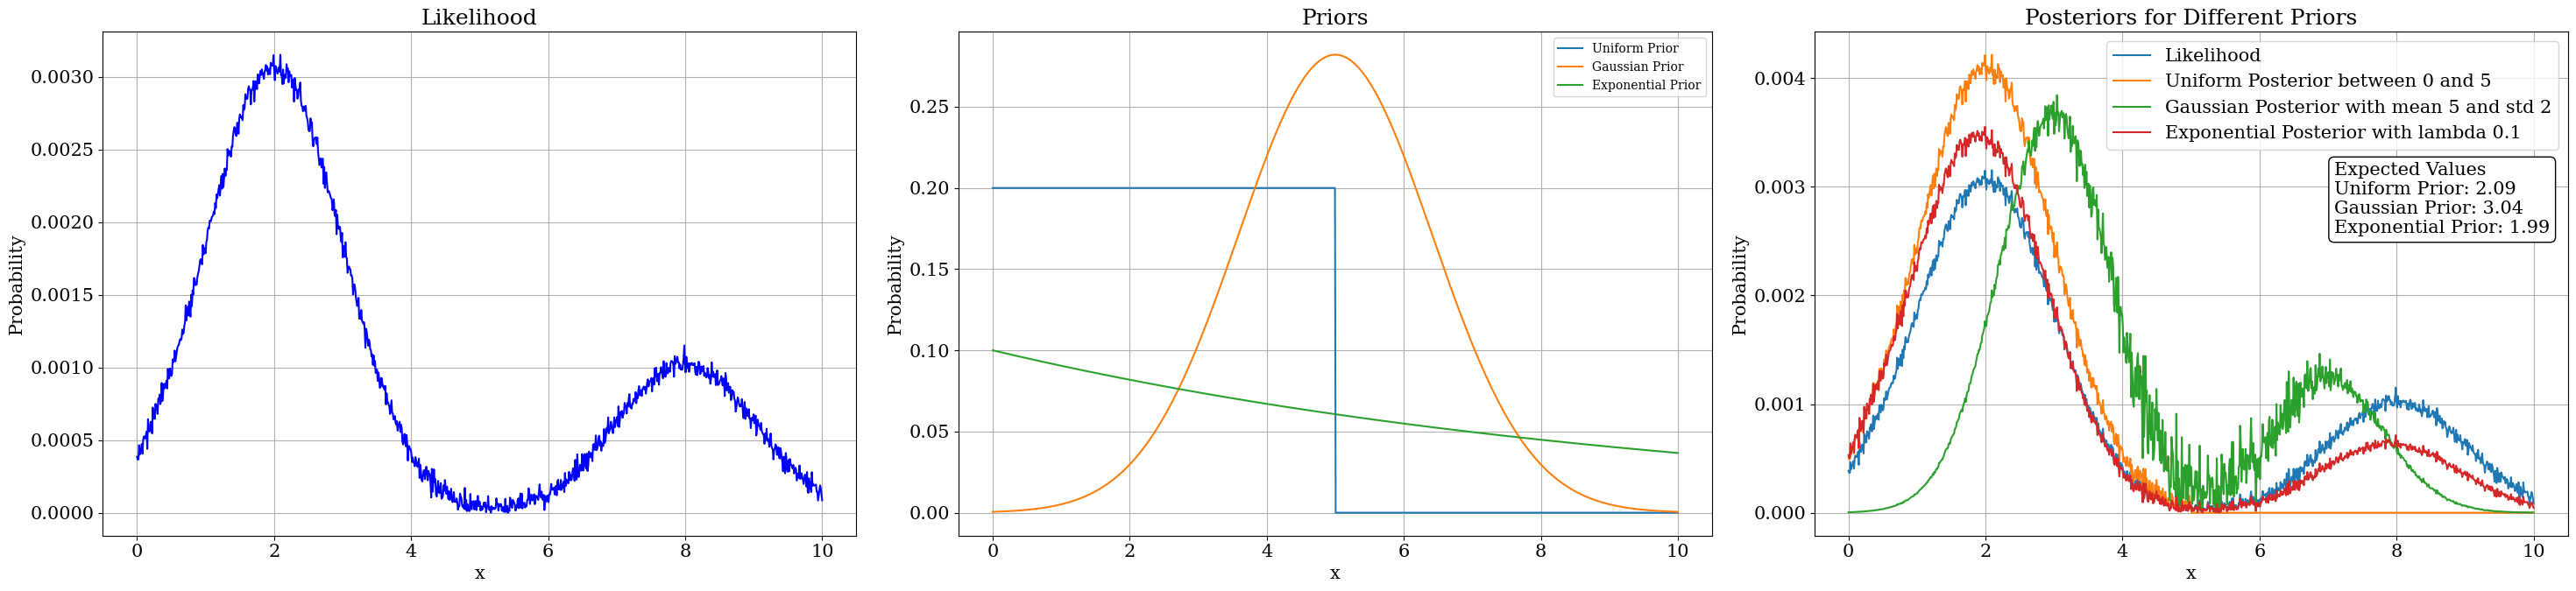

In [82]:
# # Basian Statistics

# ## A Noisy Bimodal Distribution as the likelihood

# x = np.linspace(0, 10, 1000)
# likelihood = 0.75*np.exp(-0.5*(x - 2)**2) + 0.25*np.exp(-0.5*(x - 8)**2) + np.random.normal(0, 0.01, len(x))

# likelihood = abs(likelihood)/sum(abs(likelihood))

# fig, axes = plt.subplots(1, 3, figsize = (30, 7))

# ax = axes[0]
# ax.plot(x, likelihood, label = 'Likelihood', color = 'blue')
# ax.set_xlabel('x')
# ax.set_ylabel('Probability')
# ax.grid(True)
# ax.set_title('Likelihood')
# # plt.savefig('bimodal_likelihood.png')

# ## Uniform Prior between 0 and 5, zero elsewhere
# def uniform_prior(x, min_val, max_val):
#     return uniform.pdf(x, loc=min_val, scale=max_val)

# un_prior = uniform_prior(x, 0, 5)
# un_posterior = likelihood*un_prior
# un_posterior = un_posterior/sum(un_posterior)

# ## Gaussian Prior with mean 5 and standard deviation 2
# def gaussian_prior(x):
#     return np.exp(-0.5*(x - 5)**2/2)/np.sqrt(2*np.pi*2)

# gau_prior = gaussian_prior(x)
# gau_posterior = likelihood*gau_prior
# gau_posterior = gau_posterior/sum(gau_posterior)

# ## Right Skewed Expoential Prior 
# def exponential_prior(x, lam):
#     return lam*np.exp(-lam*x)

# exp_prior = exponential_prior(x, 0.1)
# exp_posterior = likelihood*exp_prior
# exp_posterior = exp_posterior/sum(exp_posterior)

# # Plotting the priors
# ax = axes[1]
# # ax.plot(x, likelihood, label = 'Likelihood')
# ax.plot(x, un_prior, label = 'Uniform Prior')
# ax.plot(x, gau_prior, label = 'Gaussian Prior')
# ax.plot(x, exp_prior, label = 'Exponential Prior')
# ax.set_xlabel('x')
# ax.set_ylabel('Probability')
# ax.legend(fontsize = 10)
# ax.grid(True)
# ax.set_title('Priors')
# # plt.savefig('priors.png')

# # Plotting the posteriors
# ax = axes[2]
# ax.plot(x, likelihood, label = 'Likelihood')
# ax.plot(x, un_posterior, label = 'Uniform Posterior between 0 and 5')
# ax.plot(x, gau_posterior, label = 'Gaussian Posterior with mean 5 and std 2')
# ax.plot(x, exp_posterior, label = 'Exponential Posterior with lambda 0.1')
# ax.set_xlabel('x')
# ax.set_ylabel('Probability')
# ax.legend(fontsize = 15)
# ax.grid(True)
# ax.set_title('Posteriors for Different Priors')

# # Writing the expected values for the posteriors
# un_expected = x[np.argmax(un_posterior)]
# gau_expected = x[np.argmax(gau_posterior)]
# exp_expected = x[np.argmax(exp_posterior)]

# bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)

# ax.text(0.69, 0.6, f'Expected Values\nUniform Prior: {un_expected:.2f}\nGaussian Prior: {gau_expected:.2f}\nExponential Prior: {exp_expected:.2f}',
#             transform = ax.transAxes, fontsize = 15, bbox = bbox_props)

# # ax.text(0.5, 0.5, f'Uniform Prior: {un_expected:.2f}', transform = ax.transAxes, fontsize = 15)
# # ax.text(0.5, 0.45, f'Gaussian Prior: {gau_expected:.2f}', transform = ax.transAxes, fontsize = 15)
# # ax.text(0.5, 0.4, f'Exponential Prior: {exp_expected:.2f}', transform = ax.transAxes, fontsize = 15)

# plt.tight_layout()
# plt.savefig('bayesian_statistics.png')

In [81]:
# ## Variogram and Kriging

# # A Completely Random Field
# np.random.seed(0)
# x = np.random.uniform(0, 10, 100)
# y = np.random.uniform(0, 10, 100)
# z = np.random.normal(0, 1, 100)

# fig, axes = plt.subplots(2, 2, figsize = (15, 10))

# ax = axes[0, 0]
# sc = ax.scatter(x, y, c = z, cmap = 'viridis')
# plt.colorbar(sc, ax = ax)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.grid(True)
# ax.set_title('Random Field')
# # plt.savefig('random_field.png')

# # Variogram
# def variogram(x, y, z, h):
#     n = len(x)
#     gamma = 0
#     for i in range(n):
#         for j in range(i+1, n):
#             if np.linalg.norm([x[i] - x[j], y[i] - y[j]]) <= h:
#                 gamma += (z[i] - z[j])**2
#     return gamma/(2*n)

# h = np.linspace(0, 10, 100)
# gamma = [variogram(x, y, z, i) for i in h]

# ax = axes[0, 1]
# ax.plot(h, gamma, label = 'Variogram')
# ax.set_xlabel('h')
# ax.set_ylabel('Variogram')
# ax.grid(True)
# ax.set_title('Variogram of Random Field')
# # plt.savefig('variogram.png')

# # Random Field with one cluster
# np.random.seed(0)
# x = np.random.uniform(0, 10, 25)
# y = np.random.uniform(0, 10, 25)
# x_cl = np.random.uniform(4, 8, 75)
# y_cl = np.random.uniform(4, 8, 75)
# x = np.hstack([x, x_cl])
# y = np.hstack([y, y_cl])
# z = np.random.normal(0, 1, 100)

# ax = axes[1, 0]
# sc = ax.scatter(x, y, c = z, cmap = 'viridis')
# plt.colorbar(sc, ax = ax)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.grid(True)
# ax.set_title('Clustered Field')
# # plt.savefig('clustered_field.png')

# # Variogram
# h = np.linspace(0, 10, 100)
# gamma = [variogram(x, y, z, i) for i in h]

# ax = axes[1, 1]
# ax.plot(h, gamma, label = 'Variogram')
# ax.set_xlabel('h')
# ax.set_ylabel('Variogram')
# ax.set_title('Variogram of Clustered Field')
# ax.grid(True)
# # plt.savefig('clustered_variogram.png')

# plt.tight_layout()
# plt.savefig('variogram.png')